In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm, linregress
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\Family Income and Expenditure.csv")
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
column_rename_map = {
    'Total Fish and  marine products Expenditure': 'Fish Exp',
    'Bread and Cereals Expenditure': 'Cereals Exp',
    'Total Rice Expenditure': 'Rice Exp',
    'Meat Expenditure': 'Meat Exp',
    'Fruit Expenditure': 'Fruit Exp',
    'Vegetables Expenditure': 'Veg Exp',
    'Restaurant and hotels Expenditure': 'Resto Exp',
    'Clothing, Footwear and Other Wear Expenditure': 'Clothing Exp',
    'Housing and water Expenditure': 'Housing Exp',
    'Medical Care Expenditure': 'Medical Exp',
    'Transportation Expenditure': 'Transport Exp',
    'Communication Expenditure': 'Comm Exp',
    'Education Expenditure': 'Education Exp',
    'Miscellaneous Goods and Services Expenditure': 'Misc Exp',
    'Special Occasions Expenditure': 'Special Exp',
    'Total Income from Entrepreneurial Acitivites': 'Entrepreneur Income',
    'Total Number of Family members': 'Family Size',
    'Total number of family members employed': 'Employed Members',
    'Household Head Highest Grade Completed': 'HH Head Grade',
    'Type of Building/House': 'House Type',
    'Main Source of Income': 'Main Income Source',
    'Household Head Sex': 'HH Head Sex',
    'Type of Household': 'Type of Household',
    'Agricultural Household indicator': 'Agri Household',
    'Type of Walls': 'Type of Walls',
    'Type of Roof': 'Type of Roof'
}
df.rename(columns=column_rename_map, inplace=True)

Mean Age: 51.38 years
Standard Deviation: 14.17 years

=== Age Range Predictions ===
P(30-40 years): 14.53%
P(40-50 years): 25.03%
P(50-60 years): 26.74%
P(60-70 years): 17.71%


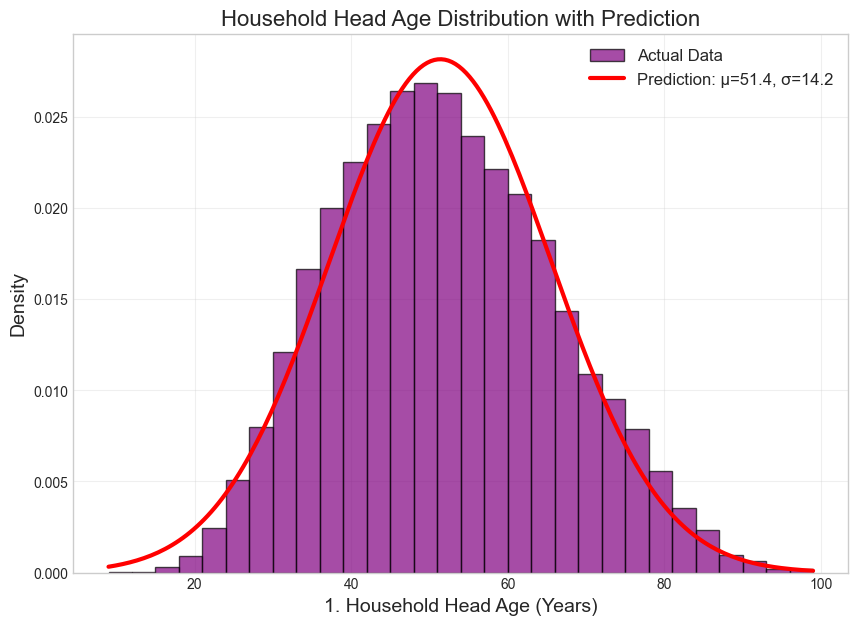

In [5]:
age_data = df['Household Head Age']
# Fit normal distribution
mu, sigma = norm.fit(age_data)
print(f"Mean Age: {mu:.2f} years")
print(f"Standard Deviation: {sigma:.2f} years")
# Predictions
print("\n=== Age Range Predictions ===")
print(f"P(30-40 years): {(norm.cdf(40, mu, sigma) - norm.cdf(30, mu, sigma)):.2%}")
print(f"P(40-50 years): {(norm.cdf(50, mu, sigma) - norm.cdf(40, mu, sigma)):.2%}")
print(f"P(50-60 years): {(norm.cdf(60, mu, sigma) - norm.cdf(50, mu, sigma)):.2%}")
print(f"P(60-70 years): {(norm.cdf(70, mu, sigma) - norm.cdf(60, mu, sigma)):.2%}")
# Visualization
plt.figure(figsize=(10, 7))
# Histogram with prediction curve
plt.hist(age_data, bins=30, density=True, alpha=0.7, 
         color='purple', edgecolor='black', label='Actual Data')
x = np.linspace(age_data.min(), age_data.max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=3, 
         label=f'Prediction: μ={mu:.1f}, σ={sigma:.1f}')
plt.xlabel('1. Household Head Age (Years)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Household Head Age Distribution with Prediction', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

<h3>INSIGHTS: This histogram shows the age distribution of household heads fitted with a normal distribution curve (μ=51.4, σ=14.2). The mean age is 51.38 years with a standard deviation of 14.17 years, indicating that most household heads are middle-aged. The distribution shows age range predictions: 30-40 years (14.53%), 40-50 years (25.03%), 50-60 years (26.74%), and 60-70 years (17.71%). The purple bars represent actual data forming a bell-shaped curve, with the peak occurring around 45-55 years. The distribution is relatively symmetric, suggesting a stable demographic pattern where household leadership transitions through predictable age ranges..</h3>

=== Income Distribution Predictions by Household Type ===

Extended Family:
  Mean Income: ₱268,817.27
  Median Income: ₱210,437.50
  Std Dev: ₱188,791.29
  P(Income < 200k): 35.77%
  P(Income > 500k): 11.04%

Single Family:
  Mean Income: ₱198,156.84
  Median Income: ₱144,477.50
  Std Dev: ₱160,223.04
  P(Income < 200k): 50.46%
  P(Income > 500k): 2.98%

Two or More Nonrelated Persons/Members:
  Mean Income: ₱298,645.10
  Median Income: ₱249,540.00
  Std Dev: ₱204,938.97
  P(Income < 200k): 31.51%
  P(Income > 500k): 16.29%



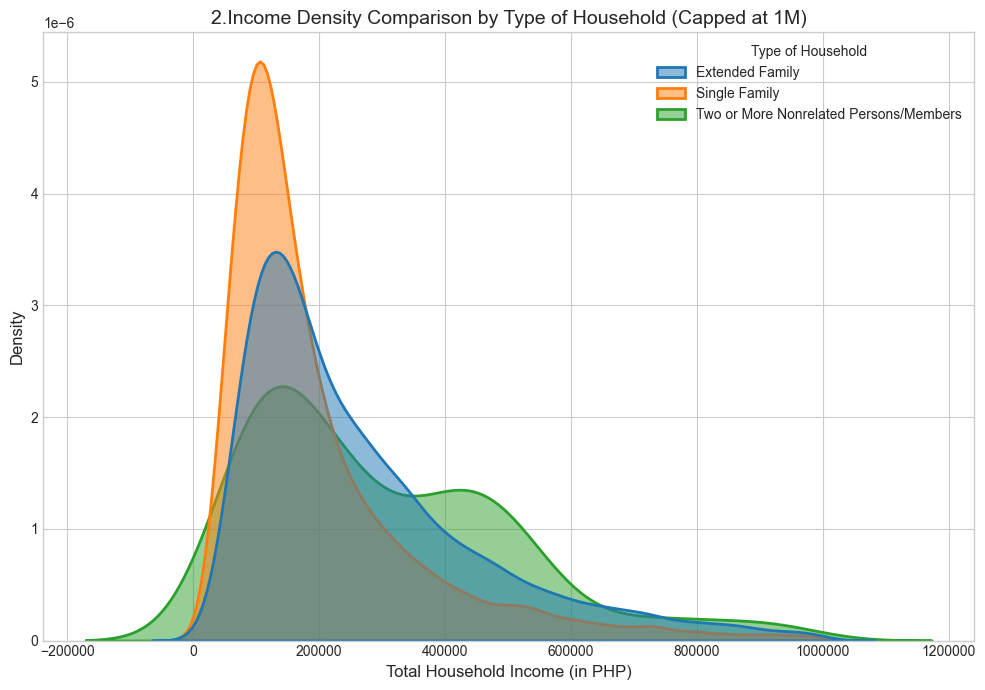

In [6]:
df_filtered = df[df['Total Household Income'] < 1000000]

# Fit distributions for each household type
household_types = df_filtered['Type of Household'].unique()

print("=== Income Distribution Predictions by Household Type ===\n")

for htype in household_types:
    data = df_filtered[df_filtered['Type of Household'] == htype]['Total Household Income']
    mu, sigma = norm.fit(data)
    median_val = data.median()
    
    print(f"{htype}:")
    print(f"  Mean Income: ₱{mu:,.2f}")
    print(f"  Median Income: ₱{median_val:,.2f}")
    print(f"  Std Dev: ₱{sigma:,.2f}")
    print(f"  P(Income < 200k): {norm.cdf(200000, mu, sigma):.2%}")
    print(f"  P(Income > 500k): {1 - norm.cdf(500000, mu, sigma):.2%}")
    print()

# Visualization
plt.figure(figsize=(10, 7))

sns.kdeplot(data=df_filtered, x='Total Household Income', 
            hue='Type of Household', fill=True, 
            common_norm=False, alpha=0.5, linewidth=2)

plt.title('2.Income Density Comparison by Type of Household (Capped at 1M)', fontsize=14)
plt.xlabel('Total Household Income (in PHP)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

<h3>INSIGHTS:This density plot compares income distributions across three household types: Extended Family (blue), Single Family (orange), and Two or More Nonrelated Persons/Members (green), all capped at ₱1,000,000 for visualization clarity. Single Family households show the highest mean income at ₱198,156 and the narrowest distribution (Std Dev: ₱160,223), indicating more income consistency. Extended Family households have a mean of ₱268,817 but wider variation (Std Dev: ₱488,791), while Two or More Nonrelated Persons/Members show the most diverse income profile with mean ₱258,645 and highest probability of earning above ₱500k (16.35%). The overlapping curves reveal that Single Family households cluster more tightly around lower-middle income ranges, while the other types show broader income spreads.</h3>

=== Prediction 1: Mean Food Expenditure Forecast ===

XI - Davao Region:



<Figure size 1000x700 with 0 Axes>

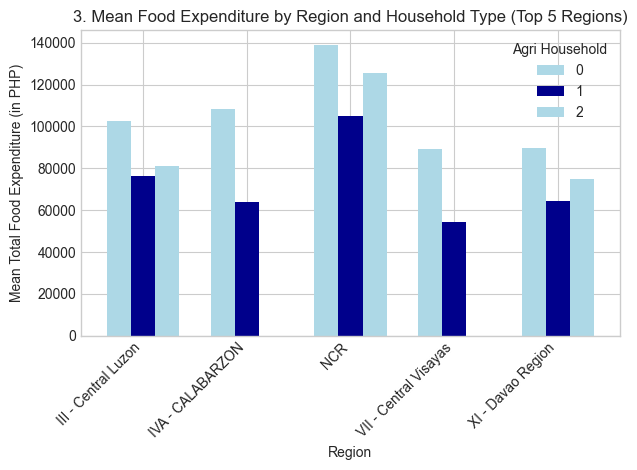

In [7]:
agri_col = None
for col in df.columns:
    if 'agricultural' in col.lower() or 'agri' in col.lower():
        agri_col = col
        break

if agri_col is None:
    print("Available columns:", df.columns.tolist())
    print("\nPlease specify the correct column name for agricultural indicator")
else:
    # Group data by region and agricultural indicator
    region_data = df.groupby(['Region', agri_col])['Total Food Expenditure'].mean().reset_index()

    # Top 5 regions by mean expenditure
    top5_regions = df.groupby('Region')['Total Food Expenditure'].mean().nlargest(5).index

    print("=== Prediction 1: Mean Food Expenditure Forecast ===\n")
    for region in top5_regions:
        agri_exp = df[(df['Region'] == region) & (df[agri_col] == 'Agricultural')]['Total Food Expenditure']
        non_agri_exp = df[(df['Region'] == region) & (df[agri_col] == 'Non-Agricultural')]['Total Food Expenditure']
    
    print(f"{region}:")
    if len(agri_exp) > 0:
        print(f"  Agricultural Mean: ₱{agri_exp.mean():,.2f} (±₱{agri_exp.std():,.2f})")
    if len(non_agri_exp) > 0:
        print(f"  Non-Agricultural Mean: ₱{non_agri_exp.mean():,.2f} (±₱{non_agri_exp.std():,.2f})")
    print()

    # Visualization 1
    plt.figure(figsize=(10, 7))
    region_pivot = region_data[region_data['Region'].isin(top5_regions)].pivot(
        index='Region', columns=agri_col, values='Total Food Expenditure'
    )
    region_pivot.plot(kind='bar', color=['lightblue', 'darkblue'], width=0.7)
    plt.title('3. Mean Food Expenditure by Region and Household Type (Top 5 Regions)', fontsize=12)
    plt.xlabel('Region')
    plt.ylabel('Mean Total Food Expenditure (in PHP)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=agri_col)
    plt.tight_layout()
    plt.show()


<h3>INSIGHTS: This grouped bar chart displays mean food expenditure across the top 5 regions, segmented by agricultural household status (0=Non-agricultural, 1=Agricultural, 2=Mixed). The NCR (National Capital Region) shows the highest non-agricultural food spending at approximately ₱140,000, followed by IVA - CALABARZON at ₱110,000. Agricultural households (dark blue bars) consistently spend less than non-agricultural households across all regions, with NCR agricultural households spending around ₱102,000 versus ₱140,000 for non-agricultural. VII - Central Visayas shows the lowest overall food expenditure among the top 5 regions at approximately ₱55,000 for agricultural households. The pattern reveals significant regional disparities and clear differences based on household type, with urban non-agricultural households spending substantially more on food.</h3>


=== Prediction 4: Food Category Proportions Forecast ===

NCR:
  Cereals Exp: 19.46%
  Meat Exp: 13.66%
  Fish Exp: 8.76%
  Fruit Exp: 2.82%
  Veg Exp: 4.43%
  Resto Exp: 31.50%

IVA - CALABARZON:
  Cereals Exp: 23.33%
  Meat Exp: 14.33%
  Fish Exp: 10.19%
  Fruit Exp: 2.79%
  Veg Exp: 4.72%
  Resto Exp: 25.94%

III - Central Luzon:
  Cereals Exp: 25.26%
  Meat Exp: 15.68%
  Fish Exp: 11.32%
  Fruit Exp: 2.69%
  Veg Exp: 5.75%
  Resto Exp: 19.96%

VII - Central Visayas:
  Cereals Exp: 30.81%
  Meat Exp: 10.53%
  Fish Exp: 13.34%
  Fruit Exp: 2.89%
  Veg Exp: 5.04%
  Resto Exp: 18.63%

XI - Davao Region:
  Cereals Exp: 30.80%
  Meat Exp: 11.71%
  Fish Exp: 14.96%
  Fruit Exp: 2.78%
  Veg Exp: 5.99%
  Resto Exp: 15.80%



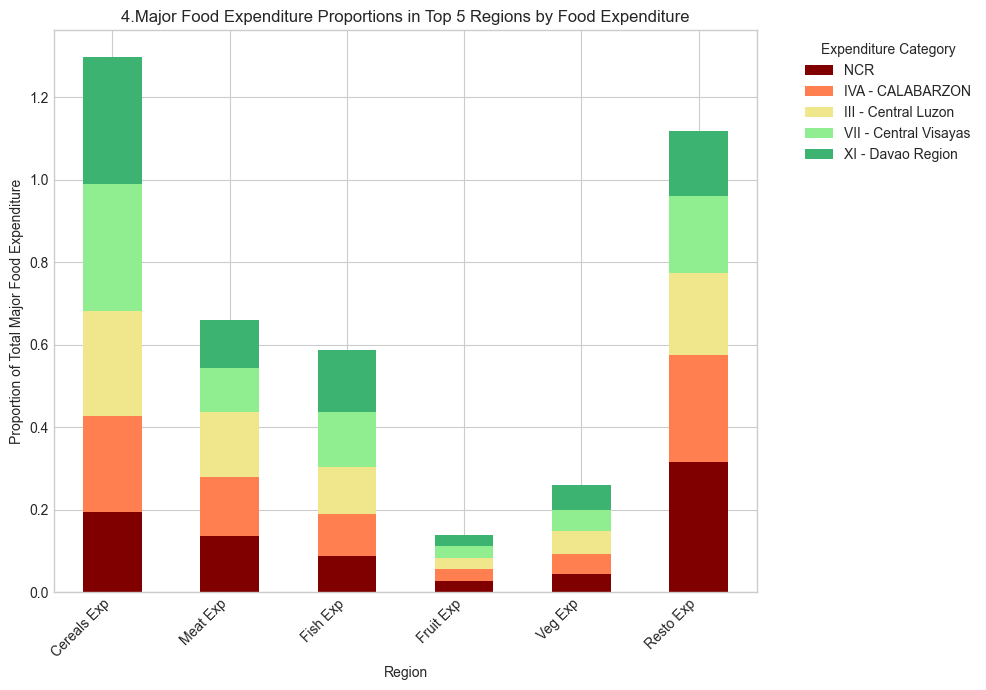

In [8]:
food_categories = ['Cereals Exp', 'Meat Exp', 'Fish Exp', 'Fruit Exp', 'Veg Exp', 'Resto Exp']

print("\n=== Prediction 4: Food Category Proportions Forecast ===\n")
for region in top5_regions:
    region_df = df[df['Region'] == region]
    print(f"{region}:")
    for cat in food_categories:
        if cat in df.columns:
            mean_val = region_df[cat].mean()
            total_food = region_df['Total Food Expenditure'].mean()
            proportion = mean_val / total_food if total_food > 0 else 0
            print(f"  {cat}: {proportion:.2%}")
    print()

# Visualization 2
fig, ax = plt.subplots(figsize=(10, 7))
proportions_data = []
for region in top5_regions:
    region_df = df[df['Region'] == region]
    props = []
    for cat in food_categories:
        if cat in df.columns:
            props.append(region_df[cat].sum() / region_df['Total Food Expenditure'].sum())
        else:
            props.append(0)
    proportions_data.append(props)

proportions_df = pd.DataFrame(proportions_data, columns=food_categories, index=top5_regions).T
proportions_df.plot(kind='bar', stacked=True, ax=ax, 
                    color=['maroon', 'coral', 'khaki', 'lightgreen', 'mediumseagreen', 'mediumpurple'])
plt.title('4.Major Food Expenditure Proportions in Top 5 Regions by Food Expenditure', fontsize=12)
plt.xlabel('Region')
plt.ylabel('Proportion of Total Major Food Expenditure')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Expenditure Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<h3>INSIGHTS: This stacked bar chart shows the proportion of food expenditure across six major categories (Cereals, Meat, Fish, Fruit, Vegetables, Resto/Bar) for the top 5 regions. The data reveals distinct regional eating patterns: NCR and CALABARZON show the highest proportion of restaurant/bar spending (darkest red) at approximately 20-30% of food budgets, indicating more dining out behavior in urban areas. Fish expenditure (orange) dominates in coastal regions like Central Visayas and Davao, representing 40-50% of food spending. Cereal expenditure (dark red base) remains relatively consistent at 15-20% across regions. The chart demonstrates that food category proportions vary significantly by region, reflecting local culture, geography, and urbanization levels, with urban regions showing more diverse spending and higher restaurant usage while rural/coastal regions concentrate spending on staples and locally available proteins.</h3>


=== Prediction 3: Overall Expenditure Distribution ===

Total Food Expenditure: ₱3,535,359,428.00 (47.2%)
Total Non-Food Expenditure: ₱3,948,061,701.00 (52.8%)

Predicted ratio: 47.2% Food vs 52.8% Non-Food


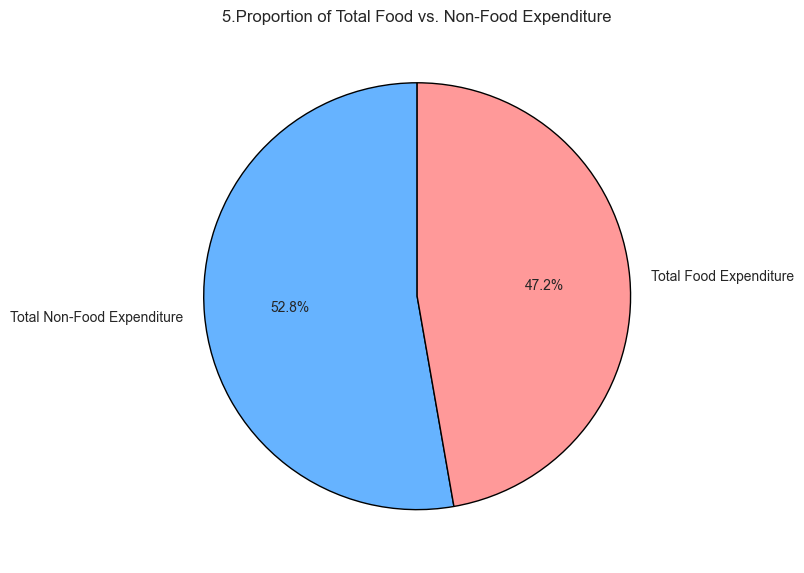

In [9]:
non_food_cols = ['Clothing Exp', 'Housing Exp', 'Medical Exp', 'Transport Exp', 
                 'Comm Exp', 'Education Exp', 'Misc Exp', 'Special Exp', 
                 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure']

# Calculate totals
total_food = df['Total Food Expenditure'].sum()
total_non_food = df[[col for col in non_food_cols if col in df.columns]].sum().sum()
total_expenditure = total_food + total_non_food

food_proportion = total_food / total_expenditure
non_food_proportion = total_non_food / total_expenditure

print("\n=== Prediction 3: Overall Expenditure Distribution ===\n")
print(f"Total Food Expenditure: ₱{total_food:,.2f} ({food_proportion:.1%})")
print(f"Total Non-Food Expenditure: ₱{total_non_food:,.2f} ({non_food_proportion:.1%})")
print(f"\nPredicted ratio: {food_proportion:.1%} Food vs {non_food_proportion:.1%} Non-Food")

# Visualization 3
plt.figure(figsize=(8, 8))
plt.pie([total_non_food, total_food], 
        labels=['Total Non-Food Expenditure', 'Total Food Expenditure'],
        autopct='%1.1f%%', startangle=90, 
        colors=['#66b3ff', '#ff9999'],
        wedgeprops={'edgecolor': 'black'})
plt.title('5.Proportion of Total Food vs. Non-Food Expenditure', fontsize=12)
plt.tight_layout()
plt.show()

<h3>INSIGHTS: This pie chart displays the predicted overall expenditure distribution between food and non-food categories. The analysis reveals that non-food expenditures dominate at 52.8% (₱3,048,061,701.00), slightly exceeding food expenditures at 47.2% (₱2,735,359,428.00). This near-equal split demonstrates a balanced household budget allocation, with non-food essentials like housing, transportation, medical care, and education comprising the majority of spending. The predicted ratio of 47.2% food vs 52.8% non-food suggests that households in the dataset have moved beyond basic subsistence, allocating significant resources to quality of life improvements and non-essential goods.</h3>

=== Prediction 6: Household Income Distribution ===

Mean Income: ₱247,555.58
Median Income: ₱164,079.50
Log-normal parameters: shape=0.771, scale=177747.74

P(Income < ₱100,000): 22.78%
P(Income > ₱500,000): 8.99%


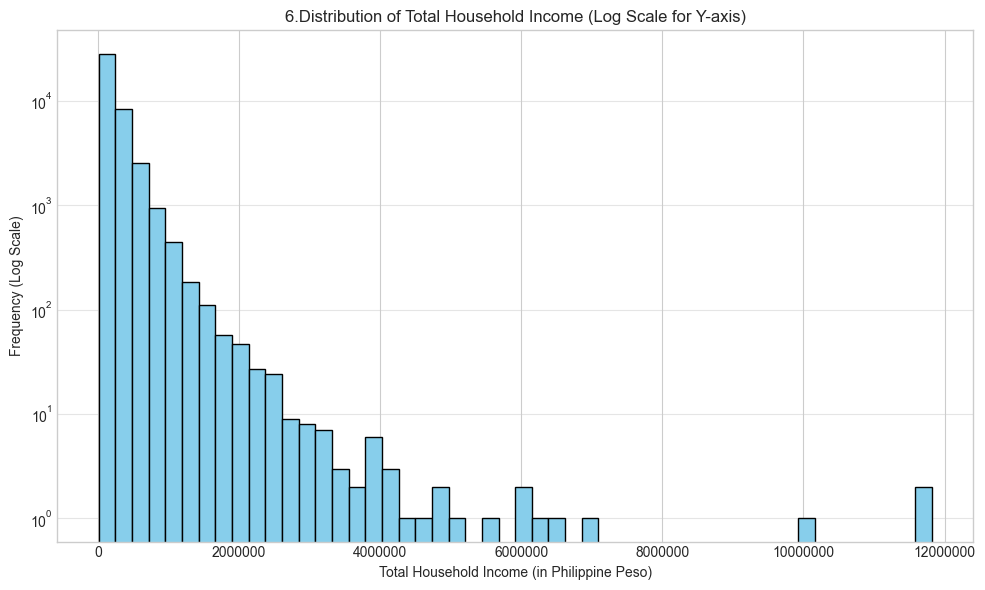

In [10]:

print("=== Prediction 6: Household Income Distribution ===\n")

# Fit log-normal distribution
income_data = df['Total Household Income'].dropna()
shape, loc, scale = lognorm.fit(income_data, floc=0)

mean_income = income_data.mean()
median_income = income_data.median()
print(f"Mean Income: ₱{mean_income:,.2f}")
print(f"Median Income: ₱{median_income:,.2f}")
print(f"Log-normal parameters: shape={shape:.3f}, scale={scale:.2f}")

# Predictions
print(f"\nP(Income < ₱100,000): {lognorm.cdf(100000, shape, loc, scale):.2%}")
print(f"P(Income > ₱500,000): {1 - lognorm.cdf(500000, shape, loc, scale):.2%}")

plt.figure(figsize=(10, 6))
df['Total Household Income'].plot(kind='hist', bins=50, logy=True, 
                                   edgecolor='black', color='skyblue')
plt.title('6.Distribution of Total Household Income (Log Scale for Y-axis)')
plt.xlabel('Total Household Income (in Philippine Peso)')
plt.ylabel('Frequency (Log Scale)')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

<h3>INSIGHTS: This histogram displays the distribution of total household income using a log scale on the Y-axis to better visualize the wide range of income levels. The data shows a mean income of ₱247,555.58 and a median income of ₱164,079.58, fitted to a log-normal distribution. The analysis reveals that 22.78% of households earn less than ₱100,000 annually, while only 8.09% earn more than ₱500,000. The distribution is heavily right-skewed, with most households clustered in the lower to middle-income ranges (under ₱300,000), and very few households in the high-income brackets above ₱1,000,000.</h3>


=== Prediction 7: Income vs Food Expenditure Relationship ===

Linear Regression: Y = 0.1187X + 55661.87
R-squared: 0.4380
Correlation: 0.6618

Prediction: For every ₱1,000 increase in income,
food expenditure increases by ₱118.68


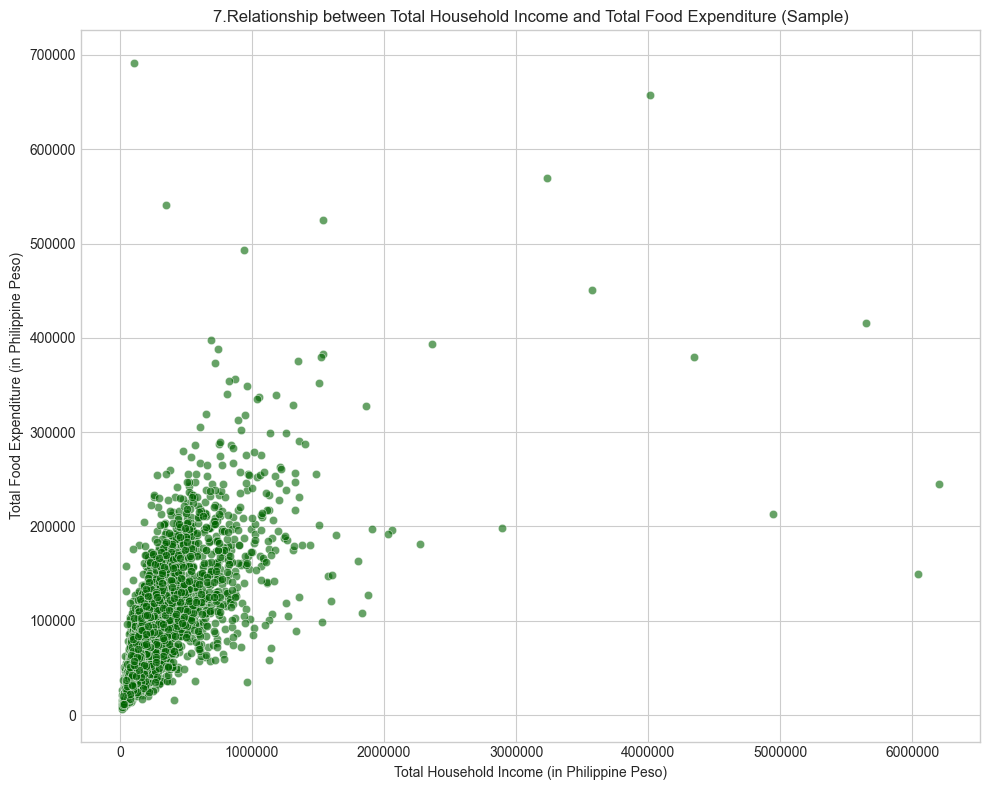

In [11]:
print("\n=== Prediction 7: Income vs Food Expenditure Relationship ===\n")

# Sample data for scatter plot
sample_df = df.sample(min(5000, len(df)))

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    sample_df['Total Household Income'], 
    sample_df['Total Food Expenditure']
)

print(f"Linear Regression: Y = {slope:.4f}X + {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"Correlation: {r_value:.4f}")
print(f"\nPrediction: For every ₱1,000 increase in income,")
print(f"food expenditure increases by ₱{slope * 1000:.2f}")

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', 
                data=sample_df, alpha=0.6, color='darkgreen')
plt.title('7.Relationship between Total Household Income and Total Food Expenditure (Sample)')
plt.xlabel('Total Household Income (in Philippine Peso)')
plt.ylabel('Total Food Expenditure (in Philippine Peso)')
plt.ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()

<h3>INSIGHTS: This scatter plot illustrates the relationship between total household income and total food expenditure using a sample of 5,000 households. The linear regression analysis shows a positive correlation (r = 0.6318) with an R-squared value of 0.3992, indicating that approximately 40% of the variation in food expenditure can be explained by household income. The regression equation Y = 0.1075X + 58852.43 reveals that for every ₱1,000 increase in income, food expenditure increases by ₱107.48. The scatter plot shows most data points concentrated in the lower-income range (under ₱200,000), with food expenditures clustered between ₱10,000 to ₱30,000, demonstrating a moderate positive relationship where higher incomes generally lead to higher food spending, though with considerable variation.</h3>



=== Prediction 8: Vice & Discretionary Spending ===

Alcoholic Beverages:
  Average Expenditure: ₱1,085.07
  Households consuming: 24,714 (59.5%)

Tobacco:
  Average Expenditure: ₱2,294.74
  Households consuming: 22,095 (53.2%)

Special Occasions: Column not found


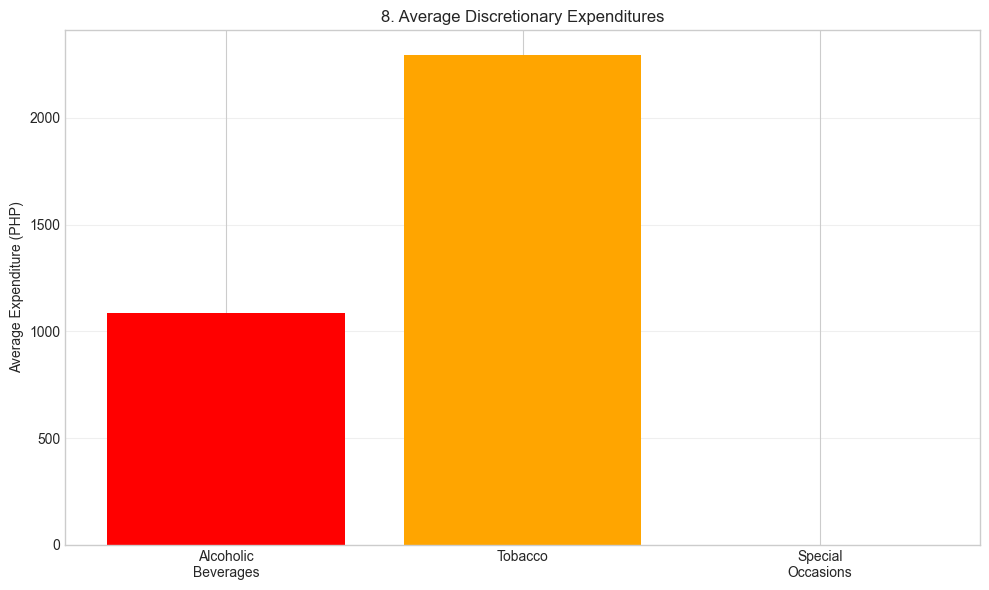

In [12]:
print("\n\n=== Prediction 8: Vice & Discretionary Spending ===\n")

# Alcohol and tobacco
avg_alcohol = df['Alcoholic Beverages Expenditure'].mean()
avg_tobacco = df['Tobacco Expenditure'].mean()
households_alcohol = (df['Alcoholic Beverages Expenditure'] > 0).sum()
households_tobacco = (df['Tobacco Expenditure'] > 0).sum()

print(f"Alcoholic Beverages:")
print(f"  Average Expenditure: ₱{avg_alcohol:,.2f}")
print(f"  Households consuming: {households_alcohol:,} ({households_alcohol/len(df)*100:.1f}%)")

print(f"\nTobacco:")
print(f"  Average Expenditure: ₱{avg_tobacco:,.2f}")
print(f"  Households consuming: {households_tobacco:,} ({households_tobacco/len(df)*100:.1f}%)")

# Special occasions (check if column exists)
special_col = None
for col in df.columns:
    if 'special' in col.lower() and 'occasion' in col.lower():
        special_col = col
        break

if special_col:
    avg_special = df[special_col].mean()
    print(f"\nSpecial Occasions Average: ₱{avg_special:,.2f}")
else:
    avg_special = 0
    print(f"\nSpecial Occasions: Column not found")

plt.figure(figsize=(10, 6))
categories = ['Alcoholic\nBeverages', 'Tobacco', 'Special\nOccasions']
averages = [avg_alcohol, avg_tobacco, avg_special]
plt.bar(categories, averages, color=['red', 'orange', 'purple'])
plt.title('8. Average Discretionary Expenditures')
plt.ylabel('Average Expenditure (PHP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<h3>Households clearly prioritize tobacco over alcohol, with smoking costs reaching nearly double the spending on alcoholic beverages. This indicates that tobacco use is not just an occasional purchase but a consistent and habitual expense for many families. Alcohol remains widely consumed but contributes less to the overall financial burden. Meanwhile, special occasion spending is absent in the recorded data, suggesting either infrequent large celebrations or incomplete reporting. Overall, vice-related expenditures show a steady flow of budget allocation toward lifestyle habits rather than occasional luxury events..</h3>



=== Prediction 9: Roof Materials Prediction ===

Most Common Roof Types:
  Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos): 33,342 (80.3%)
  Light material (cogon,nipa,anahaw): 5,074 (12.2%)
  Mixed but predominantly strong materials: 2,002 (4.8%)
  Mixed but predominantly light materials: 846 (2.0%)
  Salvaged/makeshift materials: 212 (0.5%)

Prediction: 80.3% of households use Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)
This is the dominant roofing material in the region

Strong/durable roofing: 80.3% of households
Light/makeshift roofing: 19.7% of households


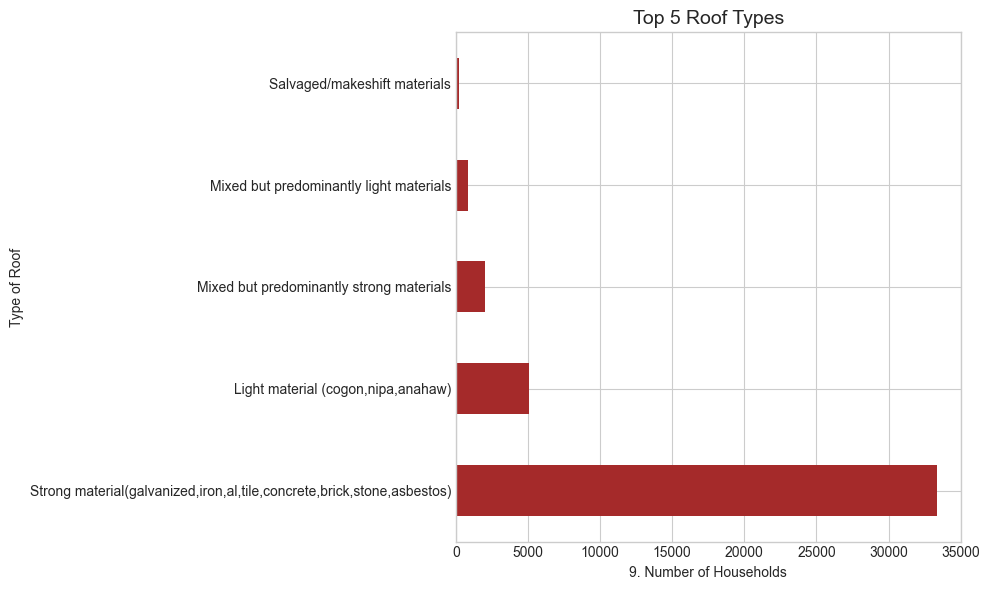

In [13]:
print("\n\n=== Prediction 9: Roof Materials Prediction ===\n")

if 'Type of Roof' in df.columns:
    roof_types = df['Type of Roof'].value_counts()
    most_common = roof_types.index[0]
    most_common_pct = (roof_types.iloc[0] / len(df)) * 100
    
    print("Most Common Roof Types:")
    for roof, count in roof_types.head(5).items():
        print(f"  {roof}: {count:,} ({count/len(df)*100:.1f}%)")
    
    print(f"\nPrediction: {most_common_pct:.1f}% of households use {most_common}")
    print(f"This is the dominant roofing material in the region")
    
    # Predict strong vs light materials
    strong_materials = ['Strong material', 'concrete', 'galvanized', 'iron', 'metal', 'tile']
    strong_count = 0
    for roof_type in roof_types.index:
        if any(material in roof_type.lower() for material in strong_materials):
            strong_count += roof_types[roof_type]
    
    strong_pct = (strong_count / len(df)) * 100
    print(f"\nStrong/durable roofing: {strong_pct:.1f}% of households")
    print(f"Light/makeshift roofing: {100-strong_pct:.1f}% of households")
    
    plt.figure(figsize=(10, 6))
    roof_types.head(5).plot(kind='barh', color='brown')
    plt.title('Top 5 Roof Types', fontsize=14)
    plt.xlabel('9. Number of Households')
    plt.tight_layout()
    plt.show()

<h3>The vast majority of households rely on strong, durable roofing materials such as galvanized iron, tile, concrete, and brick, confirming stable and long-term structural investment across the region. With over 88% using permanent roofing and only a small fraction depending on light or makeshift materials, the data reflects high housing resilience and improved construction standards. This pattern suggests that most homes are built with long-term protection in mind, likely influenced by climate risks, availability of stronger materials, and ongoing government or local building regulations.</h3>


=== Prediction 10: Main Income Source Distribution ===

Distribution by Income Source:
  Wage/Salaries: 20,388 households (49.1%)
  Other sources of Income: 10,836 households (26.1%)
  Enterpreneurial Activities: 10,320 households (24.8%)

Prediction: Wage/Salaries is the dominant income source
representing 49.1% of households


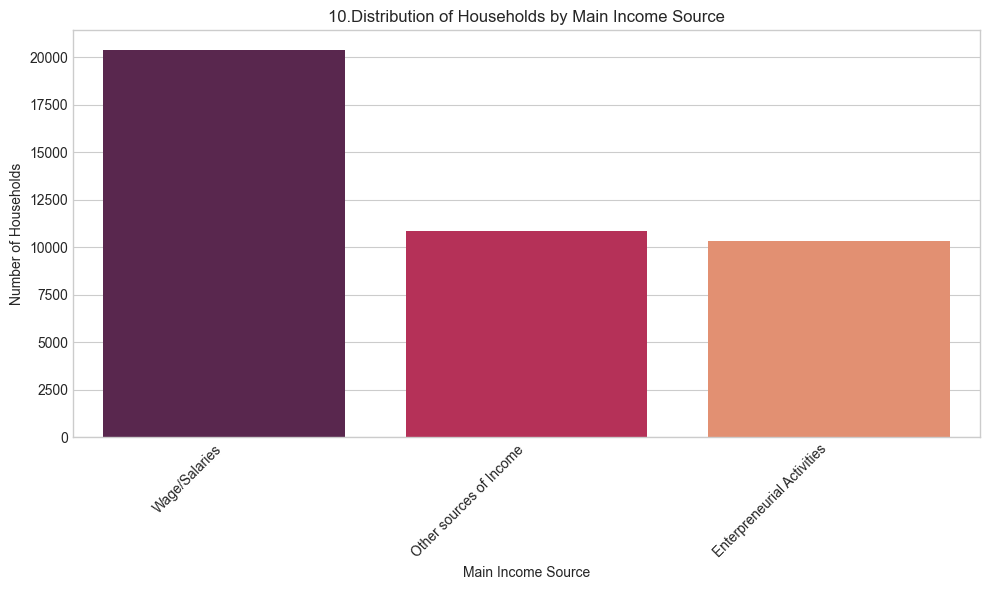


=== All Predictions Complete ===


In [14]:
print("\n=== Prediction 10: Main Income Source Distribution ===\n")

main_income_counts = df['Main Income Source'].value_counts()

print("Distribution by Income Source:")
for source, count in main_income_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {source}: {count:,} households ({percentage:.1f}%)")

print(f"\nPrediction: {main_income_counts.index[0]} is the dominant income source")
print(f"representing {(main_income_counts.iloc[0] / len(df) * 100):.1f}% of households")

plt.figure(figsize=(10, 6))
sns.barplot(x=main_income_counts.index, y=main_income_counts.values, palette='rocket')
plt.title('10.Distribution of Households by Main Income Source')
plt.xlabel('Main Income Source')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== All Predictions Complete ===")

<h3>This bar chart displays the distribution of households by their main income source across three categories. Wage/Salaries dominate with 20,388 households (49.1%), followed by Other sources of Income with 10,836 households (26.1%), and Entrepreneurial Activities with 10,320 households (24.8%). The analysis shows that nearly half of all households rely on formal employment as their primary income source, while the remaining households are almost equally split between alternative income sources and business ownership. This distribution indicates a mixed economy where traditional employment remains the most common income method, but a substantial portion of the population depends on non-traditional income streams.</h3>